In [2]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.datasets import make_circles

In [3]:
X , y = make_circles(n_samples=1000 ,noise=0.3 , factor=0.2 , random_state=41)

In [4]:
X.shape , y.shape

((1000, 2), (1000,))

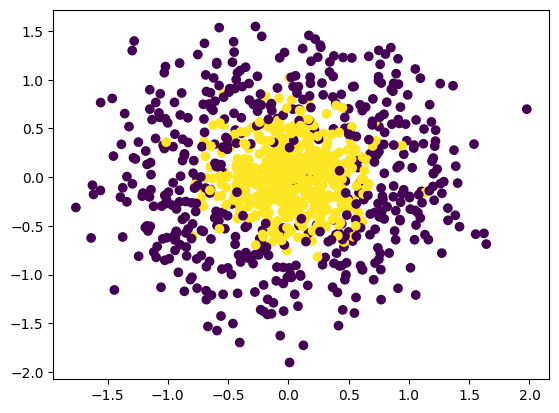

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0] , X[:,1] , c=y)
plt.show()

In [ ]:
abc = AdaBoostClassifier()  # choosing default hyperparameter
# By deafult base_estimator is Decision Tree with tree depth 1 called decision stums
# n_estimator = 50 , learnig_rate =1 , learning_rate will be multiplied to alpha
# if we incraese no of estimator then chances of overfitting is more 
# so in that case we can decrease learning_rate and can keep between(0,0.9999) beacuse this
# value will be multiplied to alpha so it will decrease the weightage of estimator 

# h(x) = sign(alpha1*h1(x) + alpha2*h2(x) + alpha3*h3(x) + .........+alphan*hn(x))
# in case of learning rate not equal to 1 , it will be multiplied in each alpha

# h1 , h2 , ... hn are base estimator ( decision stums)
# only these hypereparameter are there 
# In this algorithm , model is being trained sequentially(one after one) not parallelly 
# like Random Forest
abc.fit(X,y)
print("accuracy:" , np.mean(cross_val_score(abc , X , y , cv=10)))


accuracy: 0.873


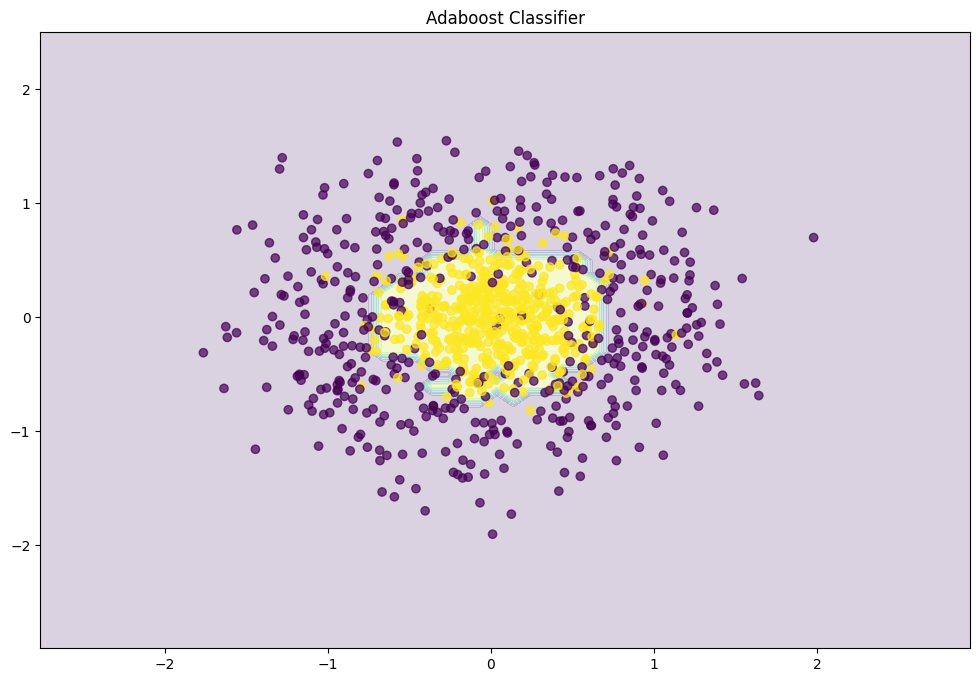

In [ ]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_min , x_max = X[:,0].min()-1 , X[:,0].max()+1
    y_min , y_max = X[:,1].min()-1 , X[:,1].max()+1

    xx , yy = np.meshgrid(np.arange(x_min , x_max ,0.1) , np.arange(y_min , y_max ,0.1))
    
    z= np.c_[xx.ravel() , yy.ravel()]
    y_pred = clf.predict(z)
    y_pred = y_pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)


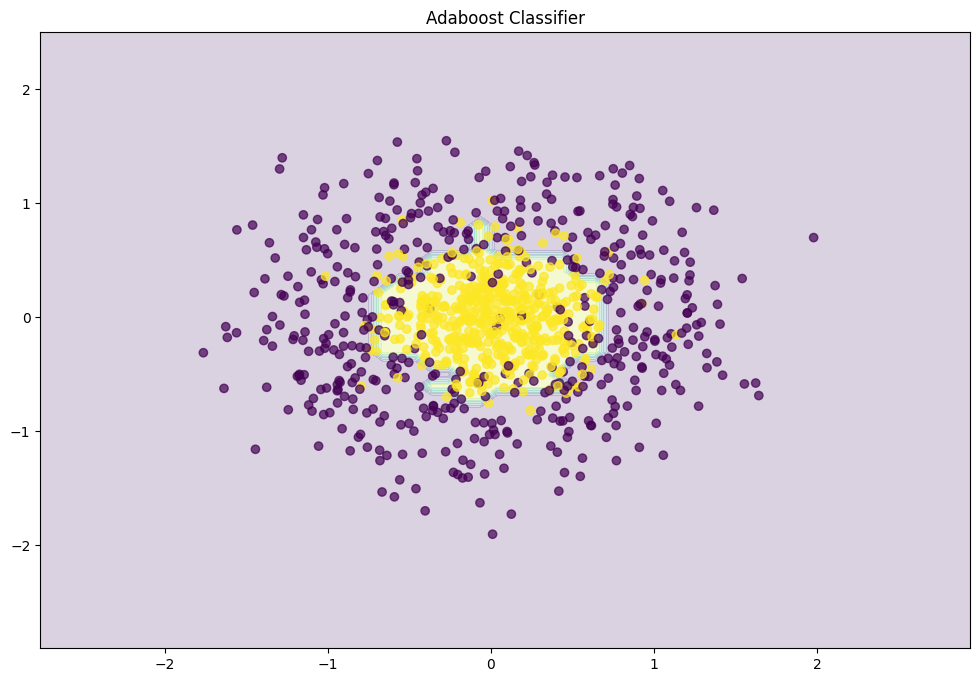

In [ ]:
abc = AdaBoostClassifier(n_estimators=1500)
abc.fit(X,y)    # it may overfit 
plot_decision_boundary(abc)

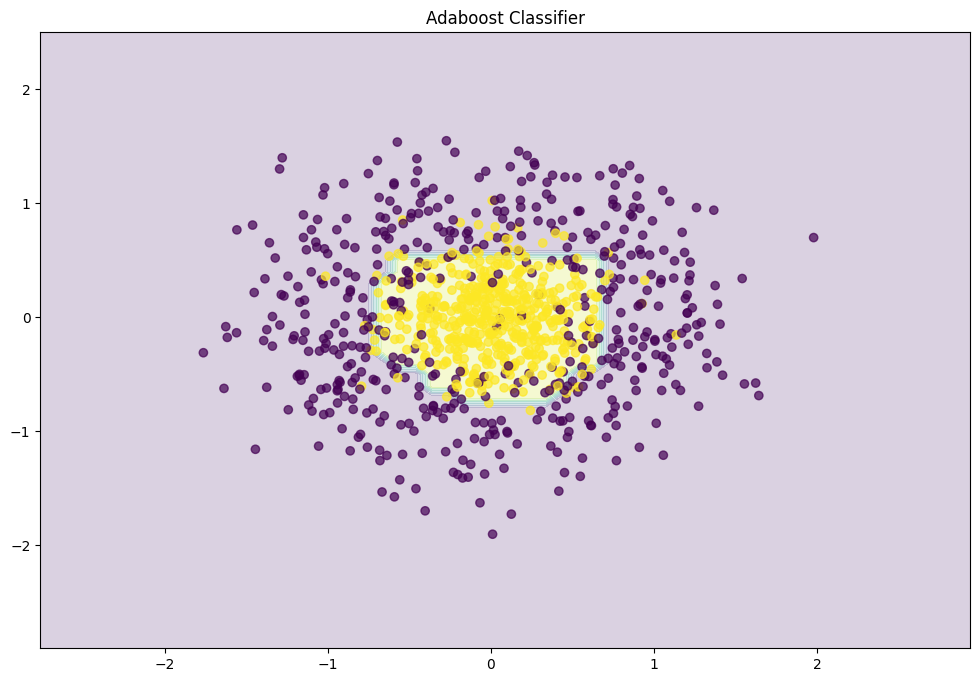

In [ ]:
abc = AdaBoostClassifier(n_estimators=1500 , learning_rate=0.1)
abc.fit(X,y)  # By decrreasing the learning_rate from 1 to 0.1 it will reduce the overfitting
plot_decision_boundary(abc)

In [24]:
# Grid Search cv
parameter = {}
parameter['n_estimators'] = [50 , 100 , 200 , 500]
parameter['learning_rate'] = [0.05 , 0.1 , 0.3 ,0.8 ,1]
parameter['algorithm'] = ['SAMME' , 'SAMME.R']  # I Forgot to tell about this hyperparametr 
# This is the algorithm being used to calculate the parameter
grid = GridSearchCV(estimator=AdaBoostClassifier() , param_grid=parameter , cv=10 , n_jobs=2,
                    scoring='accuracy')
grid_result = grid.fit(X,y)

c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\base.py", line 471, in _validate_par

In [26]:
grid_result.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 200}

In [27]:
grid_result.best_score_

np.float64(0.8779999999999999)